Name-Rajrishi Sarkar  
Roll-203110061  
***trying to fit  different regression models on the wine quality dataset after preprocessin the data  and 
exploratory data analysis***  

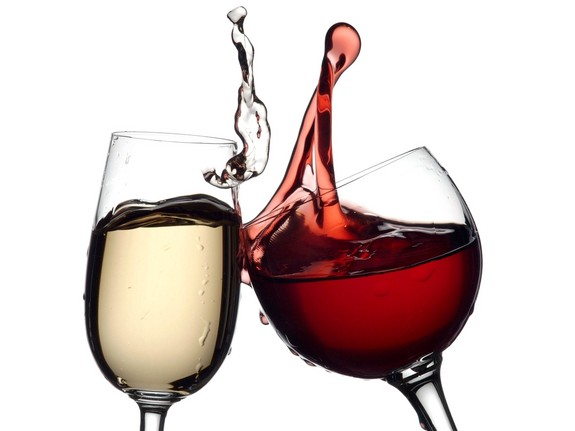

# Importing basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data

In [2]:
data=pd.read_csv(r"C:\Users\ADMIN\Desktop\data for data analysis\wine quality\white.csv")
df=pd.DataFrame(data)

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [5]:
df.shape

(4898, 12)

# Data preprocessing & exploratory data analysis

In [6]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#no ,issing values detected

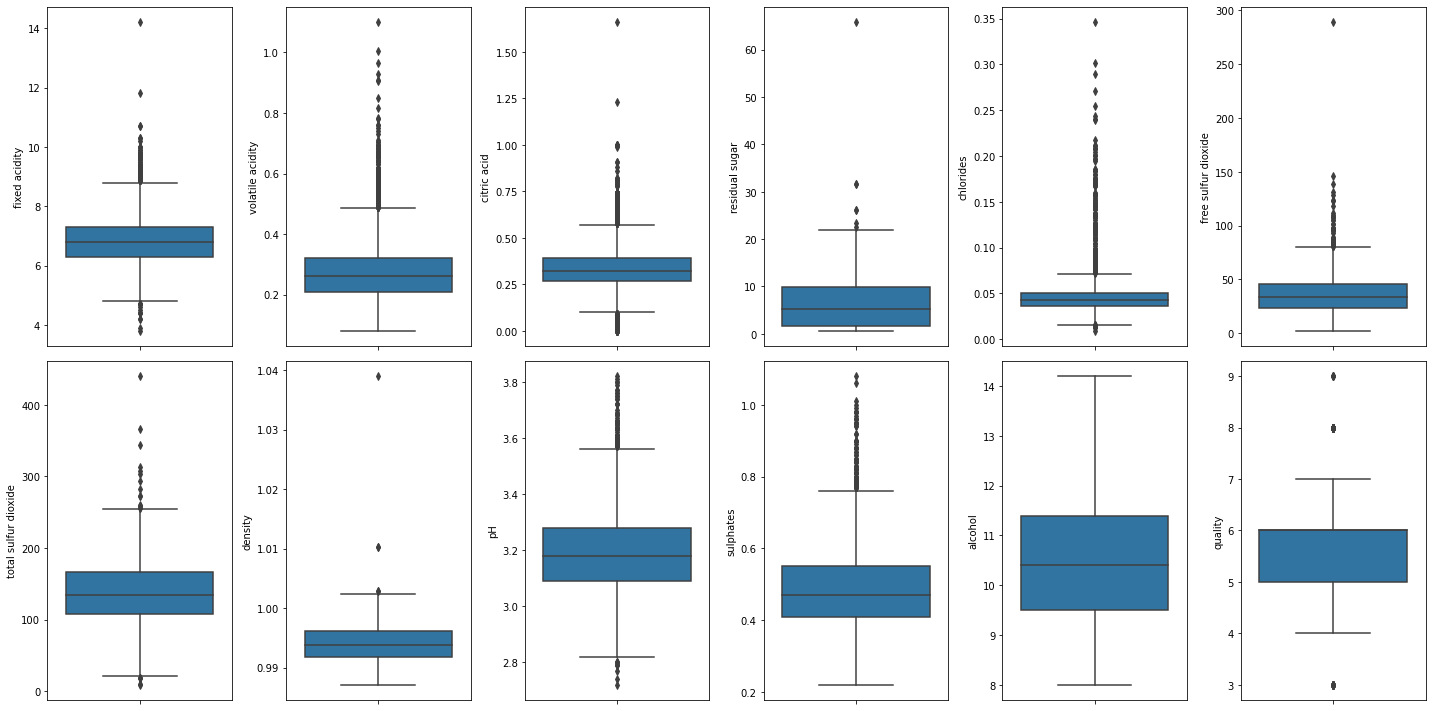

In [7]:
#creating box plots
fig,ax=plt.subplots(ncols=6,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()

for col,value in df.items():
    sns.boxplot(y=col,data=df,ax=ax[index])  #creates box plots for each column in dataframe
    index+=1
    
plt.tight_layout()   #adjusts and clarifies all the figures into the layout 

In [8]:
#outlier handling
df["alcohol"]=np.where(df["alcohol"]>=13.5,13.5,df["alcohol"])
df["pH"]=np.where(df["pH"]<=2.8,2.9,df["pH"])
df["total sulfur dioxide"]=np.where(df["total sulfur dioxide"]>=250,150,df["total sulfur dioxide"])
df["citric acid"]=np.where(df["citric acid"]>=0.8,0.8,df["citric acid"])
df["volatile acidity"]=np.where(df["volatile acidity"]>=13,13,df["volatile acidity"])
df["citric acid"]=np.where(df["citric acid"]>=0.8,0.8,df["citric acid"])

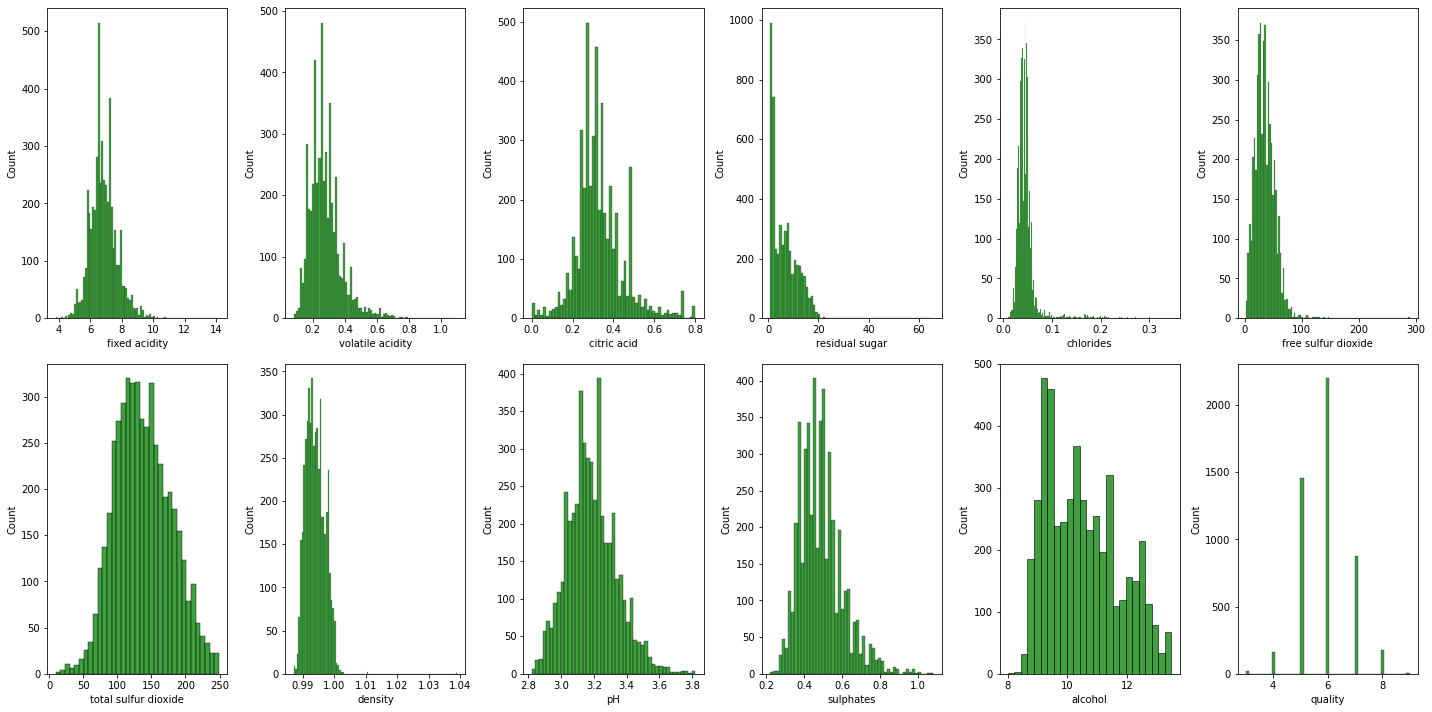

In [27]:
#creating distribution plots
fig,ax=plt.subplots(ncols=6,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()

for col,value in df.items():
    sns.histplot(value,ax=ax[index],color="green") 
    index+=1

plt.tight_layout()    


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

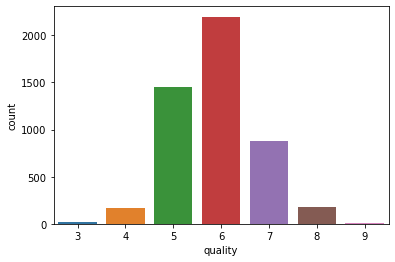

In [10]:
sns.countplot(df["quality"])

#most people are interested in 5th and 6th quality 

<AxesSubplot:>

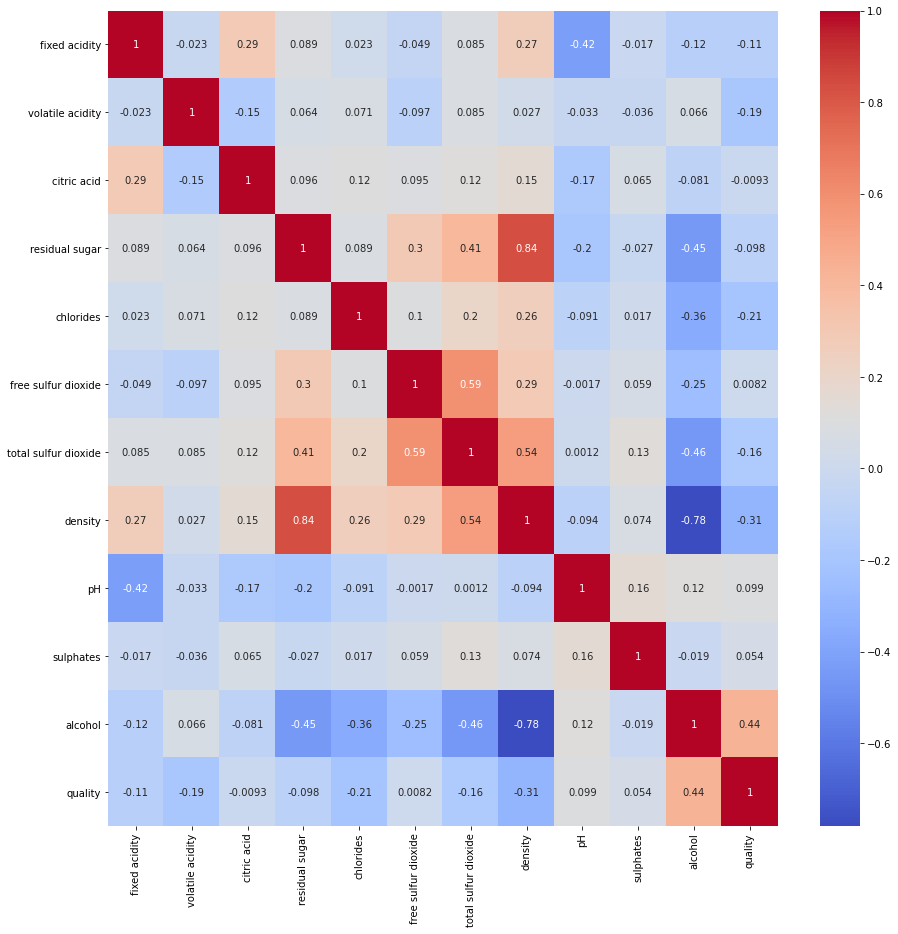

In [11]:
#correlation matrix
corr=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,cmap="coolwarm")

#from the datawe can see that quality of the data has a negative correlation with volatile acidity to some extent and a
positive correlation with alcohol
#citric acid and fixed acid are correlated
#total sulphur oxide and free sulphur oxide are correlated
#pH and fixed acidity are correlated


<AxesSubplot:xlabel='quality', ylabel='alcohol'>

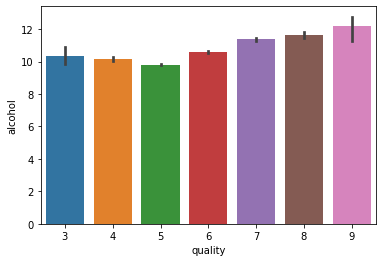

In [12]:
sns.barplot(x="quality",y="alcohol",data=df)

<AxesSubplot:xlabel='fixed acidity', ylabel='pH'>

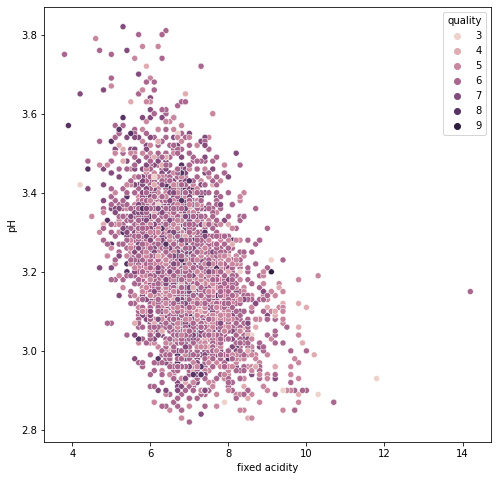

In [13]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="fixed acidity",y="pH",data=df,hue="quality")

# Spitting data into input and output

In [14]:
x=df.drop("quality",axis=1)
y=df["quality"]



# Model selection`

***testing different models and checking the feature importances***

In [15]:
#making the model report structure
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

def train(model,x,y):
    
    #training model
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=42)
    model.fit(xtrain,ytrain)
    
    #predicting using model
    pred=model.predict(xtest)
    
    #cross validation & model analysis
    cv_score=cross_val_score(model,x,y,scoring="neg_mean_squared_error",cv=5)
    cv_score=np.abs(np.mean(cv_score))
    
    print("MODEL REPORT")
    print("cv_score:",cv_score)
    print("MSE:",mean_squared_error(ytest,pred))
    

MODEL REPORT
cv_score: 0.7663409787505633
MSE: 0.7527577018199217


<AxesSubplot:title={'center':'model coefficients'}>

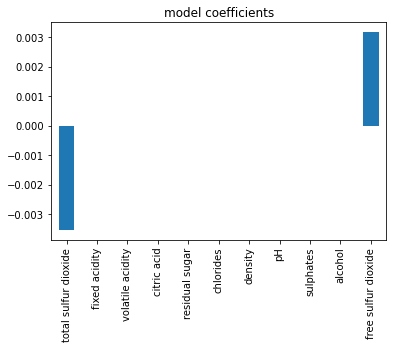

In [16]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
model=Lasso()
train(model,x,y)

#making a series of all features in the model and storing it in a variable
coef=pd.Series(model.coef_,x.columns).sort_values()

#visualizing feature importances
coef.plot(kind="bar",title="model coefficients")

MODEL REPORT
cv_score: 0.6329400885601023
MSE: 0.616488560108867


<AxesSubplot:title={'center':'model coefficients'}>

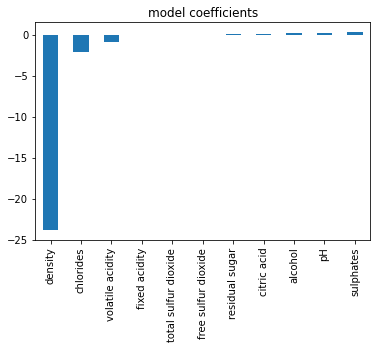

In [17]:
model=Ridge(normalize=True)
train(model,x,y)

#making a series of all features in the model and storing it in a variable
coef=pd.Series(model.coef_,x.columns).sort_values()

#visualizing feature importances
coef.plot(kind="bar",title="model coefficients")

MODEL REPORT
cv_score: 0.5336186192908215
MSE: 0.3652134693877551


<AxesSubplot:title={'center':'feature importances'}>

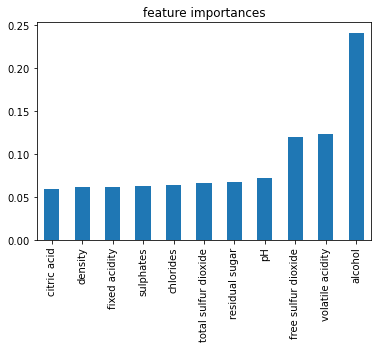

In [18]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
train(model,x,y)

#making a series of all features in the model and storing it in a variables
coef=pd.Series(model.feature_importances_,x.columns).sort_values()

##visualizing feature importances
coef.plot(kind="bar",title="feature importances")

C:\Users\ADMIN\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

MODEL REPORT
cv_score: 0.6181154966030332
MSE: 0.3928111370364634


<AxesSubplot:title={'center':'feature_importances_'}>

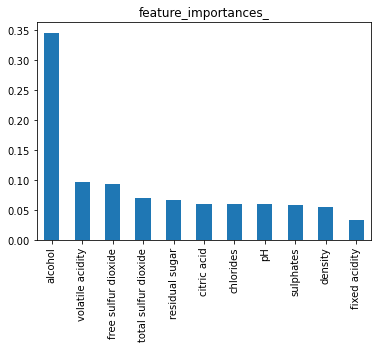

In [19]:
#installing xgboost
import sys
!{sys.executable} -m pip install xgboost

#modelling 
import xgboost as xgb
model=xgb.XGBRegressor()
train(model,x,y)

#storing all the features in a variable
coef=pd.Series(model.feature_importances_,x.columns).sort_values(ascending=False)

#visualizing the feature importances
coef.plot(kind="bar",title="feature_importances_")



***narrowing down to best models for the given dataset***

In [20]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor
from sklearn.svm import SVR

#making a list of all the models
models=[LinearRegression(),Lasso(),Ridge(),ElasticNetCV(),
DecisionTreeRegressor(),
RandomForestRegressor(),ExtraTreesRegressor(),GradientBoostingRegressor()
 ,SVR()]

In [21]:
from sklearn import model_selection
from sklearn.metrics import mean_squared_error

#creating a function to apply cv scores to all the models in the list
def Train(model):
    kfold=model_selection.KFold(n_splits=5)
    pred=model_selection.cross_val_score(model,x,y,cv=kfold,scoring="neg_mean_squared_error")
    cv_score=np.abs(pred.mean())
    print("model",model)
    print("cv_score",cv_score)


In [22]:
#running a for-loop to print the cv_score of all the models
for model in models:
    Train(model)

model LinearRegression()
cv_score 0.5829533191431213
model Lasso()
cv_score 0.7663409787505633
model Ridge()
cv_score 0.5889593392614557
model ElasticNetCV()
cv_score 0.6009038080306427
model DecisionTreeRegressor()
cv_score 1.0749092159846574
model RandomForestRegressor()
cv_score 0.5372282023722665
model ExtraTreesRegressor()
cv_score 0.5262975744512309
model GradientBoostingRegressor()
cv_score 0.5414481781199219
model SVR()
cv_score 0.6790331208000493


***lower mse means better model so we select the models with minimum score... GradientBoostingRegressor***

In [23]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=42)

#predicting with the train data in GradientBoostingRegressor model
gbr=GradientBoostingRegressor()
gbr.fit(xtrain,ytrain)
ypred=gbr.predict(xtest)


In [24]:
#error
mean_squared_error(ytest,ypred)

0.4637338189904494

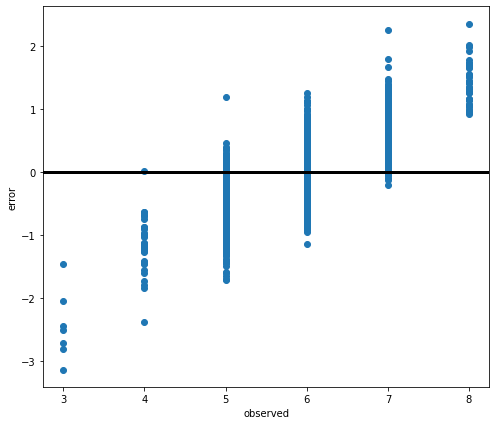

In [25]:
#plotting the error
error=ytest-ypred
fig,ax=plt.subplots(figsize=(8,7))
ax.scatter(ytest,error)
ax.axhline(lw=3,color="black")
ax.set_xlabel("observed")
ax.set_ylabel("error")
plt.show()

as it can be seen the black line is the actual data where as the blue dots represents the errors